In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cenpy import products
import seaborn as sns
sns.set()
from dotenv import dotenv_values

from census import Census
import json

In [11]:
config = dotenv_values(".env")

In [15]:
c = Census(config["CENSUS_API_KEY"])

In [4]:
gdf = gpd.read_file("../data/tracts_with_lands/tracts_with_lands.shp")

In [65]:
acs_variables = pd.DataFrame(json.load(open("../data/acs5_variables.json", 'rt'))["variables"]).transpose()
acs_variables.index = acs_variables.index.astype(str, copy=False)

In [89]:
def lookup_var(var):
    matches = acs_variables[acs_variables.index.str.match(var)]
    if matches.shape[0] == 0:
        matches = acs_variables.dropna(subset="concept")[acs_variables.concept.dropna().str.match(var)]
    if matches.shape[0] == 0:
        print("No match found.")
        return None
    return matches

def rename_cols(df):
    new_cols = []
    for col in df.columns:
        match = acs_variables[acs_variables.index.str.fullmatch(col)]
        if match.shape[0] > 0:
            new_cols.append(match["concept"][0])
        else:
            new_cols.append(col)
    df.columns = new_cols
    return df



In [87]:
me_census = pd.DataFrame.from_records(c.acs5.state_county_tract(fields = ('NAME', 'B01003_001E'),
                                      state_fips = "23",
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2019))

In [90]:
rename_cols(me_census)

,NAME,TOTAL POPULATION,state,county,tract
0,"Census Tract 24, Cumberland County, Maine",1274.0,23,005,002400
1,"Census Tract 32, Cumberland County, Maine",2984.0,23,005,003200
2,"Census Tract 40.01, Cumberland County, Maine",3223.0,23,005,004001
3,"Census Tract 37.01, Cumberland County, Maine",4182.0,23,005,003701
4,"Census Tract 42, Cumberland County, Maine",8447.0,23,005,004200
...,...,...,...,...,...
353,"Census Tract 9605, Piscataquis County, Maine",1834.0,23,021,960500
354,"Census Tract 9608, Piscataquis County, Maine",4043.0,23,021,960800
355,"Census Tract 9651, Hancock County, Maine",2008.0,23,009,965100
356,"Census Tract 9664, Hancock County, Maine",2342.0,23,009,966400


In [92]:
tracts = gpd.read_file("../data/tracts_with_lands/tracts_with_lands.shp")

In [94]:
tracts.TRACTCE

0       965700
1       965200
2       965800
3       966500
4       955100
         ...  
6992    990000
6993    990000
6994    990000
6995    990000
6996    990000
Name: TRACTCE, Length: 6997, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


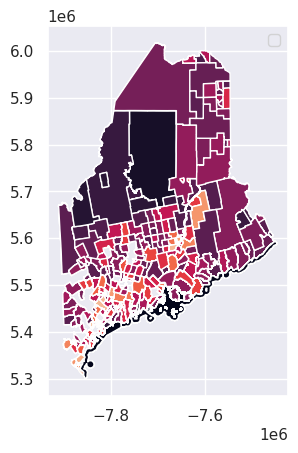

In [97]:
ax = tracts.merge(rename_cols(me_census), how="left", left_on="TRACTCE", right_on="tract").plot("TOTAL POPULATION")
ax.legend()